#### Loading the libraries

In [83]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as scipy
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pylab
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan,het_goldfeldquandt
from scipy.stats import shapiro

#### Loading the Dataset

In [2]:
data = pd.read_csv("WorldHappiness_2016.csv")

#### Displaying the first five and the last five rows of the dataset

In [4]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [81]:
data.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [5]:
data.describe()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,5.282395,5.481975,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635,2.325807
std,45.466030,1.141674,1.148043,1.136493,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756,0.542220
min,1.000000,2.905000,2.732000,3.078000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.817890
25%,40.000000,4.404000,4.327000,4.465000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570,2.031710
50%,79.000000,5.314000,5.237000,5.419000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450,2.290740
75%,118.000000,6.269000,6.154000,6.434000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850,2.664650
max,157.000000,7.526000,7.460000,7.669000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710,3.837720


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
Country                          157 non-null object
Region                           157 non-null object
Happiness Rank                   157 non-null int64
Happiness Score                  157 non-null float64
Lower Confidence Interval        157 non-null float64
Upper Confidence Interval        157 non-null float64
Economy (GDP per Capita)         157 non-null float64
Family                           157 non-null float64
Health (Life Expectancy)         157 non-null float64
Freedom                          157 non-null float64
Trust (Government Corruption)    157 non-null float64
Generosity                       157 non-null float64
Dystopia Residual                157 non-null float64
dtypes: float64(10), int64(1), object(2)
memory usage: 16.0+ KB


In [7]:
data.isnull().sum().sum() # No missing values in the dataset.

0

#### Univariate Analysis

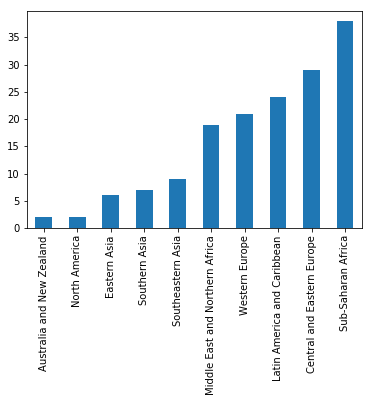

In [8]:
data.Region.value_counts().sort_values().plot(kind="bar") 

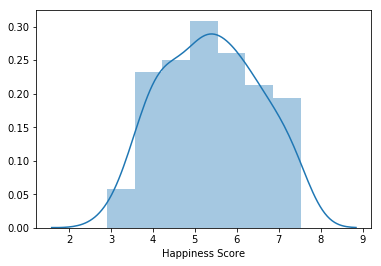

In [9]:
sns.distplot(data["Happiness Score"]) # Happiness score is our target variable in this dataset. By looking at the dataset 
# we can infer that the data for it is normally distributed.

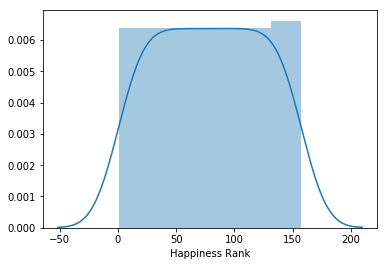

In [10]:
sns.distplot(data["Happiness Rank"]) # By looking at the distplot of happiness rank, we can see that it is platy kurtic,
# kurtosis = almost 0 and its highly densed in the middle. 

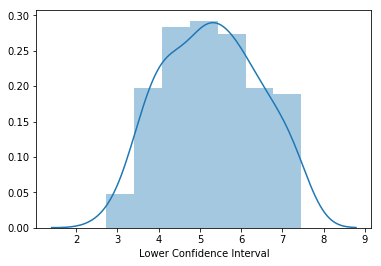

In [11]:
sns.distplot(data["Lower Confidence Interval"])

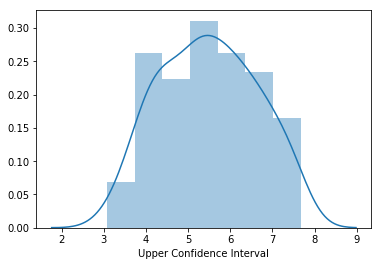

In [12]:
sns.distplot(data["Upper Confidence Interval"])

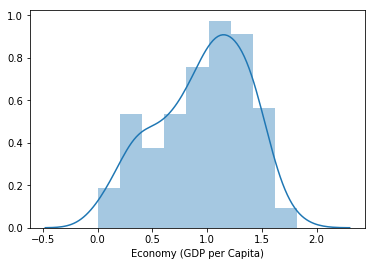

In [13]:
sns.distplot(data["Economy (GDP per Capita)"])

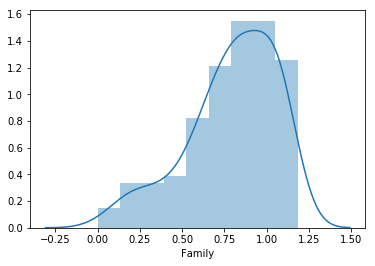

In [14]:
sns.distplot(data["Family"])

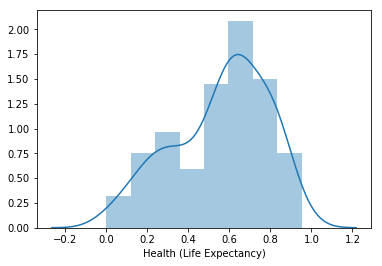

In [15]:
sns.distplot(data["Health (Life Expectancy)"])

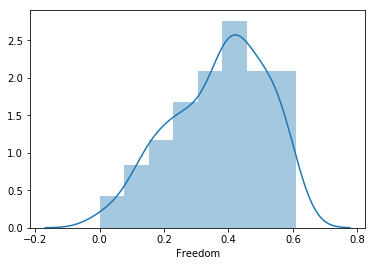

In [16]:
sns.distplot(data["Freedom"])

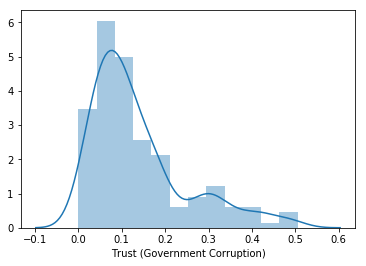

In [17]:
sns.distplot(data["Trust (Government Corruption)"])

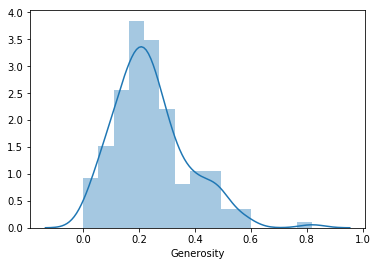

In [18]:
sns.distplot(data["Generosity"])

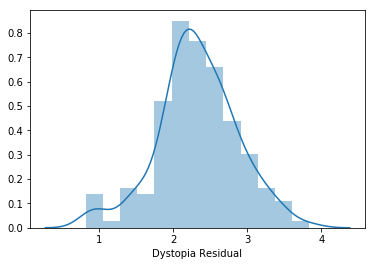

In [19]:
sns.distplot(data["Dystopia Residual"])

#### Bivariate Analysis

In [20]:
# We are going to perform bivariate analysis with each predictor against the target variable.

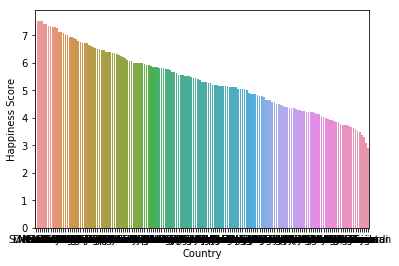

In [82]:
plt.Figure(figsize=[10,8])
sns.barplot(data["Country"],data["Happiness Score"])
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

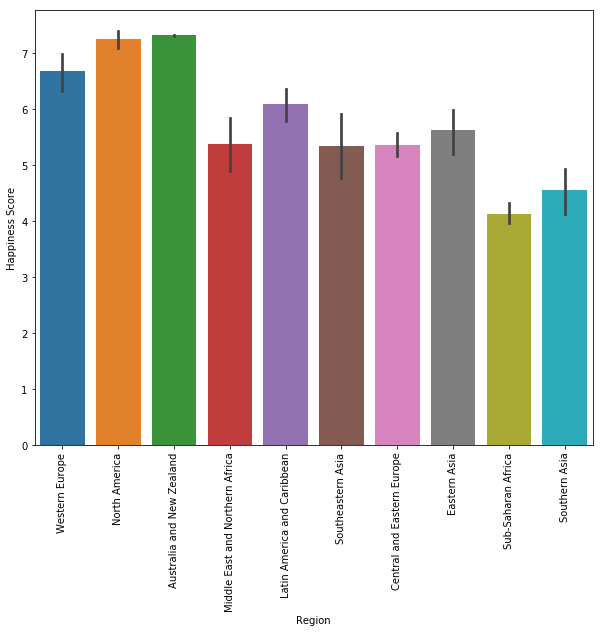

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data["Region"],data["Happiness Score"])
plt.xticks(rotation=90) # From the graph, we can see that the happiness score for the region is highest in Australia and 
# New Zealand and North America. It is the least in Sub-Saharan Africa region.

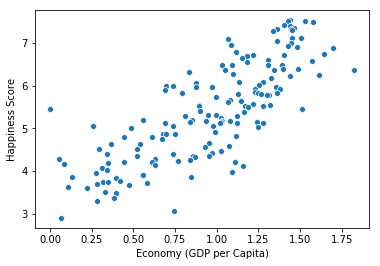

In [23]:
sns.scatterplot(data["Economy (GDP per Capita)"],data["Happiness Score"])

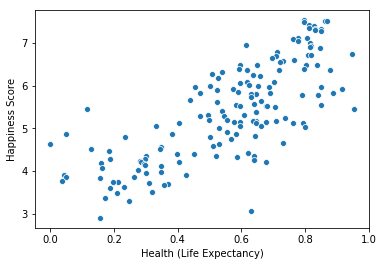

In [24]:
sns.scatterplot(data["Health (Life Expectancy)"],data["Happiness Score"])

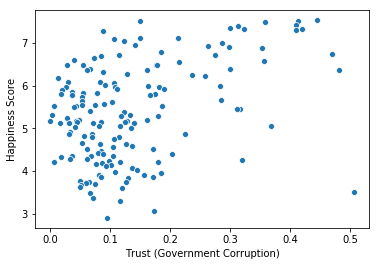

In [25]:
sns.scatterplot(data["Trust (Government Corruption)"],data["Happiness Score"])

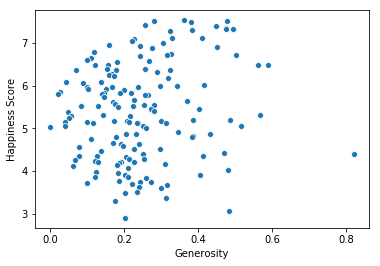

In [26]:
sns.scatterplot(data["Generosity"],data["Happiness Score"])

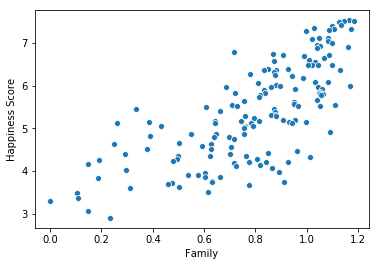

In [27]:
sns.scatterplot(data["Family"],data["Happiness Score"])

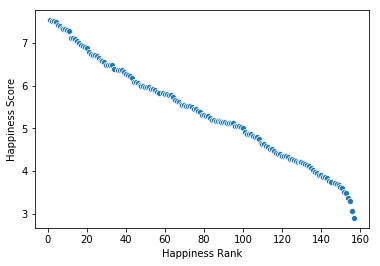

In [28]:
sns.scatterplot(data["Happiness Rank"],data["Happiness Score"])

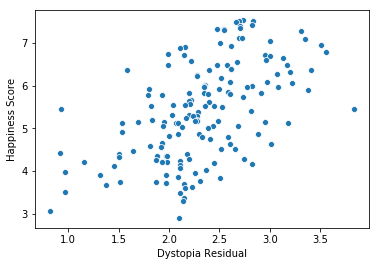

In [29]:
sns.scatterplot(data["Dystopia Residual"],data["Happiness Score"])

In [30]:
data.corr()

,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.995743,-0.994928,-0.995525,-0.793577,-0.733276,-0.767991,-0.557169,-0.387102,-0.145369,-0.542616
Happiness Score,-0.995743,1.000000,0.999485,0.999474,0.790322,0.739252,0.765384,0.566827,0.402032,0.156848,0.543738
Lower Confidence Interval,-0.994928,0.999485,1.000000,0.997919,0.790673,0.741523,0.769177,0.566857,0.404840,0.158025,0.538793
Upper Confidence Interval,-0.995525,0.999474,0.997919,1.000000,0.789140,0.736184,0.760752,0.566203,0.398775,0.155495,0.548164
Economy (GDP per Capita),-0.793577,0.790322,0.790673,0.789140,1.000000,0.669540,0.837067,0.362283,0.294185,-0.025531,0.068624
Family,-0.733276,0.739252,0.741523,0.736184,0.669540,1.000000,0.588377,0.450208,0.213561,0.089629,0.119672
Health (Life Expectancy),-0.767991,0.765384,0.769177,0.760752,0.837067,0.588377,1.000000,0.341199,0.249583,0.075987,0.100857
Freedom,-0.557169,0.566827,0.566857,0.566203,0.362283,0.450208,0.341199,1.000000,0.502054,0.361751,0.091631
Trust (Government Corruption),-0.387102,0.402032,0.404840,0.398775,0.294185,0.213561,0.249583,0.502054,1.000000,0.305930,-0.002909
Generosity,-0.145369,0.156848,0.158025,0.155495,-0.025531,0.089629,0.075987,0.361751,0.305930,1.000000,-0.133001


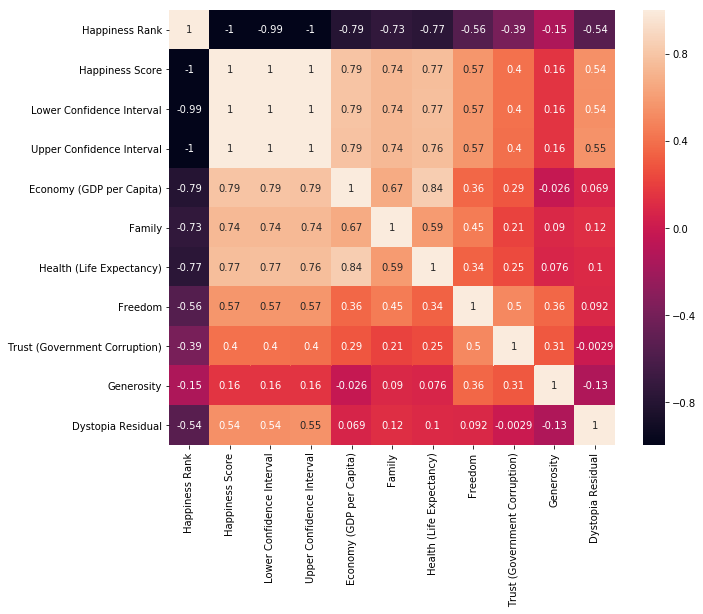

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

In [32]:
# The highly correlated variables are: (Economy & Happiness Score),(Health & Happiness Score),(Economy & Happiness Rank)
# The low correlated variables are: (Happiness Score & Generosity),(Family & Trust),(Health & Trust)

In [33]:
data.groupby("Region")["Happiness Score"].mean()

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Happiness Score, dtype: float64

In [43]:
# For making predictions we will have to test all the linear regression assumptions and make linear,ridge and lasso regression models.

In [44]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [45]:
# We will do one hot encoding by get dummies function from the pandas library.

In [46]:
dummy = pd.get_dummies(data.drop(["Country","Happiness Score","Region","Upper Confidence Interval","Lower Confidence Interval"],axis=1))

In [47]:
model = sm.OLS(data["Happiness Score"],data.drop(["Happiness Rank","Country","Happiness Score","Region","Upper Confidence Interval","Lower Confidence Interval"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.490e+09
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        04:08:00   Log-Likelihood:                 1053.8
No. Observations:                 157   AIC:                            -2094.
Df Residuals:                     150   BIC:                            -2072.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Economy (GDP per Capita)          1.0000      0.000   8191.714      0.000       1.000       1.000
Family                            1.0000      0.000   7859.188      0.000       1.000       1.000
Health (Life Expectancy)          0.9999      0.000   5082.915      0.000       0.999       1.000
Freedom                           1.0002      0.000   4579.690      0.000       1.000       1.001
Trust (Government Corruption)     0.9997      0.000   3837.407      0.000       0.999       1.000
Generosity                        1.0002      0.000   5146.945      0.000       1.000       1.001
Dystopia Residual                 1.0000   3.04e-05   3.29e+04      0.000       1.000       1.000
==============================================================================
Omnibus:                       62.289   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.410
Skew:                          -0.072   Prob(JB):                      0.00905
Kurtosis:                       1.809   Cond. No.                         33.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:
# Defining x and y
x = data.drop(["Happiness Rank","Country","Happiness Score","Region","Upper Confidence Interval","Lower Confidence Interval"],axis=1)
y = data["Happiness Score"]

In [49]:
# Splitting Data into train and test
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=123)

#### Linear Regression

In [50]:
lr = LinearRegression()

In [51]:
# Fitting the model
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
# Predicting
ypred = lr.predict(xtest)

In [53]:
rsquare = r2_score(ytest,ypred)
print("R2 score is:",rsquare)

R2 score is: 0.9999999043817035


In [54]:
rmse = np.sqrt(mean_squared_error(ytest,ypred))
print("RMSE is:",rmse)

RMSE is: 0.0003050537800105481


In [55]:
lr.coef_

array([0.99998909, 0.99996253, 0.9999191 , 1.00021686, 0.99953563,
       1.00028447, 0.99989817])

In [56]:
lr.intercept_

0.00022088309886214574

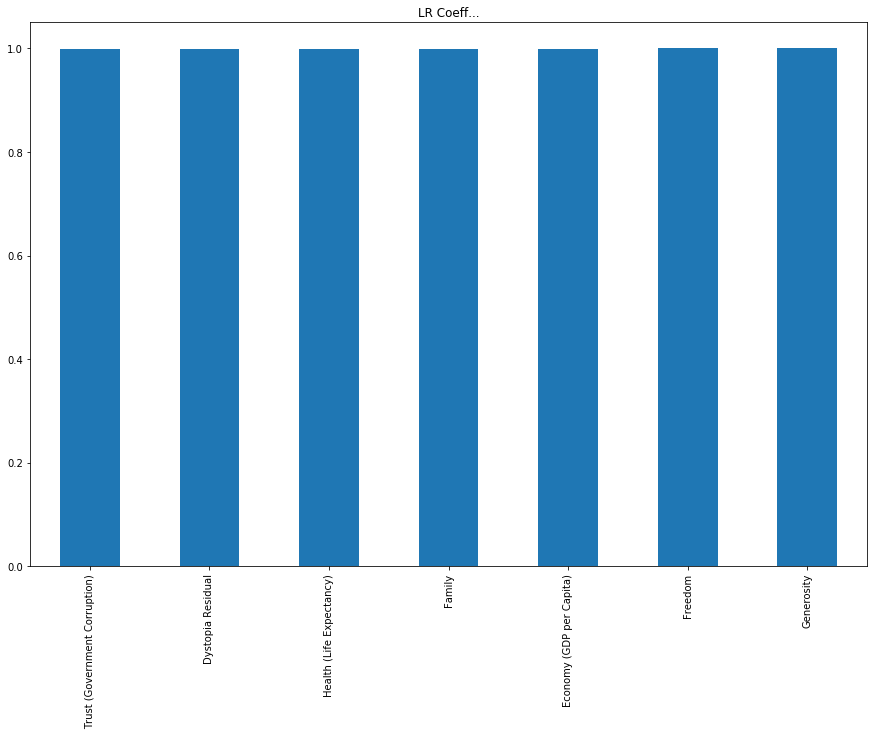

In [57]:
plt.figure(figsize=[15,10])
pd.Series(lr.coef_,x.columns).sort_values().plot(kind="bar",title="LR Coeff...")
plt.show()

#### Ridge Regression

In [58]:
R = Ridge(alpha=0.5,random_state=123)

In [59]:
# Predicting Ridge
ridge_pred = R.fit(xtrain,ytrain).predict(xtest)

In [60]:
rsquare = r2_score(ytest,ridge_pred)
print("R2 score is:",rsquare)

R2 score is: 0.9993226011701939


In [61]:
rmse = np.sqrt(mean_squared_error(ytest,ridge_pred))
print("RMSE is:",rmse)

RMSE is: 0.025676045160793227


In [62]:
R.coef_

array([1.03986103, 0.98432897, 0.91783616, 0.94580528, 0.84015945,
       0.89713329, 0.98991738])

In [63]:
R.intercept_

0.11107406453421032

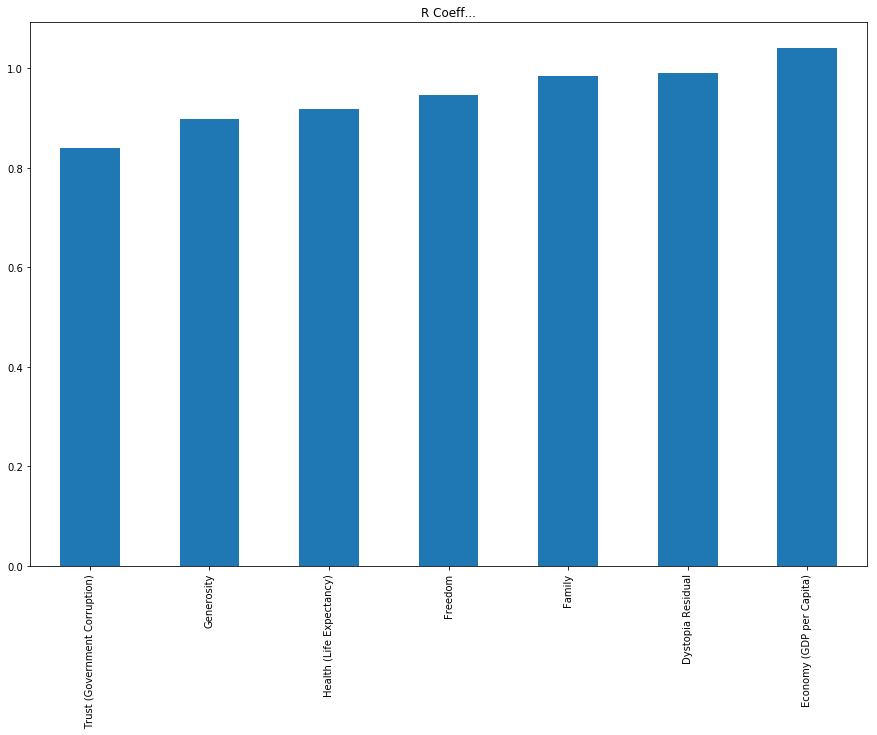

In [64]:
plt.figure(figsize=[15,10])
pd.Series(R.coef_,x.columns).sort_values().plot(kind="bar",title="R Coeff...")
plt.show()

#### Lasso Regression

In [65]:
L = Lasso(alpha=0.05,random_state=123)

In [66]:
# Predicting Lasso
lasso_pred = L.fit(xtrain,ytrain).predict(xtest)

In [67]:
r2_score(ytest,lasso_pred)

0.9052046663532752

In [68]:
np.sqrt(mean_squared_error(ytest,lasso_pred))

0.30373818227756616

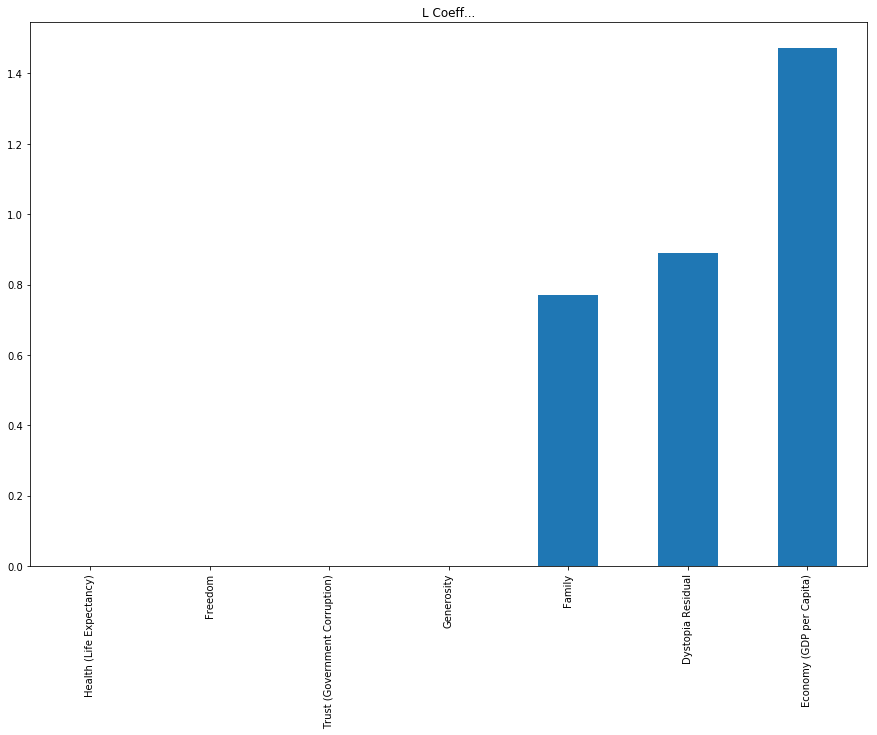

In [69]:
plt.figure(figsize=[15,10])
pd.Series(L.coef_,x.columns).sort_values().plot(kind="bar",title="L Coeff...")
plt.show()

#### Elastic Net Regression

In [70]:
Enet = ElasticNet(alpha=0.05,random_state=123)

In [71]:
# Predicing Enet
Enet_pred = Enet.fit(xtrain,ytrain).predict(xtest)

In [72]:
r2_score(ytest,Enet_pred)

0.9477209503276014

In [73]:
np.sqrt(mean_squared_error(ytest,Enet_pred))

0.2255639815954116

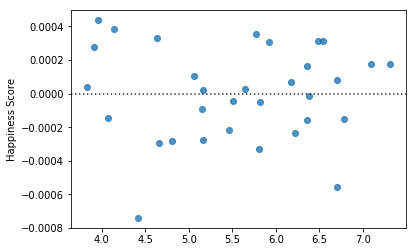

In [74]:
residual = ytest - ypred
sns.residplot(x=ypred,y=residual)

In [75]:
# No pattern is found in residplot.

In [76]:
# H0- The data is normal 
# H1- The data is not normal
# Shapiro test 
alpha = 0.05
teststats,pvalue = shapiro(residual)
print("Teststats: ",teststats)
print("Pvalue: ",pvalue)

Teststats:  0.9446370005607605
Pvalue:  0.10142118483781815


In [77]:
if (pvalue>alpha):
    print("We fail to reject the null hypothesis so it means the data is normal")
else:
    print("We will reject the null hypothesis so it means the data is not normal")

We fail to reject the null hypothesis so it means the data is normal


In [78]:
sm.stats.diagnostic.linear_rainbow(model)

(1.3576488776438174, 0.09552673426815843)

In [79]:
sms.durbin_watson(residual) # As it is between 0-2, there is positive auto correlation.

1.6073292642160848

In [80]:
# After Deploying Linear, Ridge, Lasso, ElasticNet models; we can infer that Linear Regression model is giving us the best 
# prediction.

#### Decision Tree Regressor

In [84]:
dt = DecisionTreeRegressor(random_state=123)
predict_dt = dt.fit(xtrain,ytrain).predict(xtest)

In [85]:
r2_score(ytest,predict_dt)

0.7351193746634279

In [86]:
np.sqrt(mean_squared_error(ytest,predict_dt))

0.5077278737178017

#### Random Forest Regressor

In [88]:
rf = RandomForestRegressor(random_state=123)
predict_rf = rf.fit(xtrain,ytrain).predict(xtest)

In [89]:
r2_score(ytest,predict_rf)

0.8854538874447981

In [90]:
np.sqrt(mean_squared_error(ytest,predict_rf))

0.33388436858345893

#### Gradient Boosting Regressor

In [91]:
gbr = GradientBoostingRegressor(random_state=123)
predict_gbr = gbr.fit(xtrain,ytrain).predict(xtest)

In [92]:
r2_score(ytest,predict_gbr)

0.9306395451849985

In [93]:
np.sqrt(mean_squared_error(ytest,predict_gbr))

0.25981359724931863

#### XGBoost Regressor

In [94]:
xgbr = XGBRegressor(random_state=123)
predict_xgbr = xgbr.fit(xtrain,ytrain).predict(xtest)

[04:24:58] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\ana\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [95]:
r2_score(ytest,predict_xgbr)

0.947002040639998

In [96]:
np.sqrt(mean_squared_error(ytest,predict_xgbr))

0.22710959548024465